In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("best-selling-books.csv")
df

,Book,Author(s),Original language,First published,Approximate sales in millions,Genre
0,A Tale of Two Cities,Charles Dickens,English,1859,200.0,Historical fiction
1,The Little Prince (Le Petit Prince),Antoine de Saint-Exupéry,French,1943,200.0,Novella
2,Harry Potter and the Philosopher's Stone,J. K. Rowling,English,1997,120.0,Fantasy
3,And Then There Were None,Agatha Christie,English,1939,100.0,Mystery
4,Dream of the Red Chamber (紅樓夢),Cao Xueqin,Chinese,1791,100.0,Family saga
...,...,...,...,...,...,...
169,The Goal,Eliyahu M. Goldratt,English,1984,10.0,NaN
170,Fahrenheit 451,Ray Bradbury,English,1953,10.0,NaN
171,Angela's Ashes,Frank McCourt,English,1996,10.0,NaN
172,The Story of My Experiments with Truth (સત્યના...,Mohandas Karamchand Gandhi,Gujarati,1929,10.0,NaN


In [4]:
df1=df.copy()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Book                           174 non-null    object 
 1   Author(s)                      174 non-null    object 
 2   Original language              174 non-null    object 
 3   First published                174 non-null    int64  
 4   Approximate sales in millions  174 non-null    float64
 5   Genre                          118 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 8.3+ KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
First published,174.0,1962.522989,64.268737,1304.0,1947.0,1974.0,1995.0,2018.0
Approximate sales in millions,174.0,30.097126,27.957985,10.0,14.0,20.0,36.3,200.0


In [7]:
df.columns

Index(['Book', 'Author(s)', 'Original language', 'First published',
       'Approximate sales in millions', 'Genre'],
      dtype='object')

In [8]:
df.columns=df.columns.str.replace(" ","_")

In [9]:
df.columns = df.columns.str.replace("Approximate_sales_in_millions", "Approximate_sales")

In [18]:
df.First_published=df.First_published.astype("object")

In [20]:
df.dtypes

Book                  object
Author(s)             object
Original_language     object
First_published       object
Approximate_sales    float64
Genre                 object
dtype: object

In [22]:
missing_values=df.isnull().sum()
missing_values

Book                  0
Author(s)             0
Original_language     0
First_published       0
Approximate_sales     0
Genre                56
dtype: int64

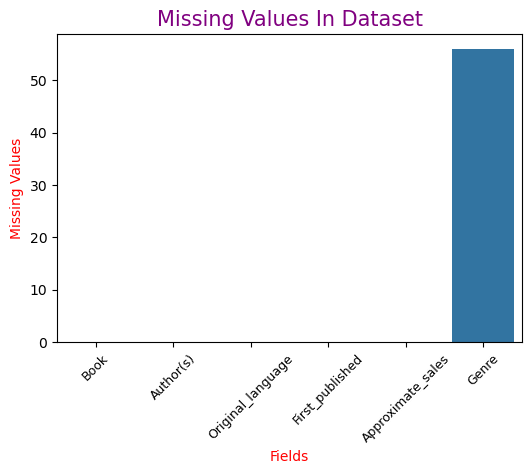

In [24]:
plt.figure(figsize=(6,4))
sns.barplot(x=missing_values.index,y=missing_values)
plt.xticks(rotation=45,fontsize=9)

plt.xlabel("Fields",color="red")
plt.ylabel("Missing Values",color="red")
plt.title("Missing Values In Dataset",color="purple",fontsize=15)
plt.show()

In [26]:
df["Author(s)"].value_counts()

Author(s)
J. K. Rowling                              7
Suzanne Collins                            3
Dan Brown                                  3
Roald Dahl                                 3
George Orwell                              2
                                          ..
Spencer Johnson                            1
Stephen Hawking                            1
Jacques-Henri Bernardin de Saint-Pierre    1
Irving Stone                               1
Helen Fielding                             1
Name: count, Length: 157, dtype: int64

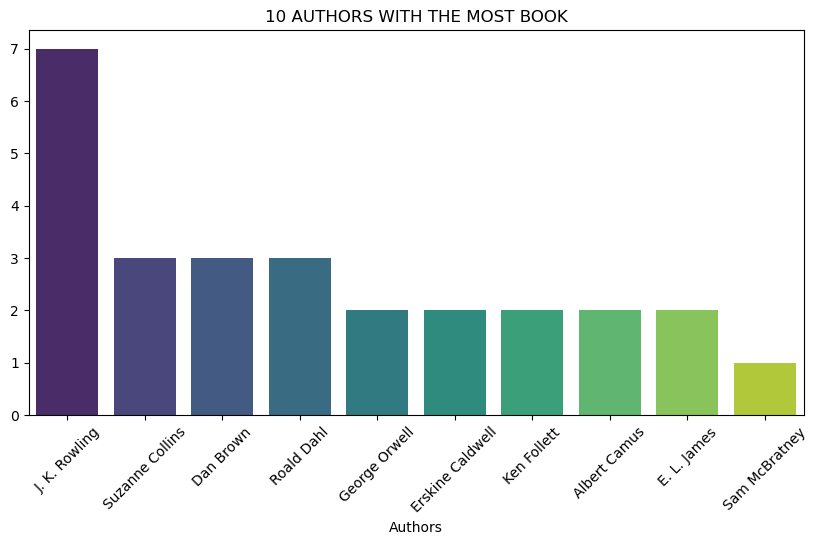

In [28]:
plt.figure(figsize=(10,5))

sns.barplot(x=df["Author(s)"].value_counts().nlargest(10).index,y=df["Author(s)"].value_counts().nlargest(10).values,palette="viridis")
plt.xticks(rotation=45)
plt.xlabel("Authors",fontsize=10)
plt.title("10 AUTHORS WITH THE MOST BOOK")
plt.show()

In [30]:
authors_sales=df.groupby("Author(s)")["Approximate_sales"].sum().sort_values(ascending=False).head(10)
authors_sales

Author(s)
J. K. Rowling               522.0
Antoine de Saint-Exupéry    200.0
Charles Dickens             200.0
Dan Brown                   149.0
Agatha Christie             100.0
J. R. R. Tolkien            100.0
Cao Xueqin                  100.0
C. S. Lewis                  85.0
H. Rider Haggard             83.0
Ved Prakash Sharma           80.0
Name: Approximate_sales, dtype: float64

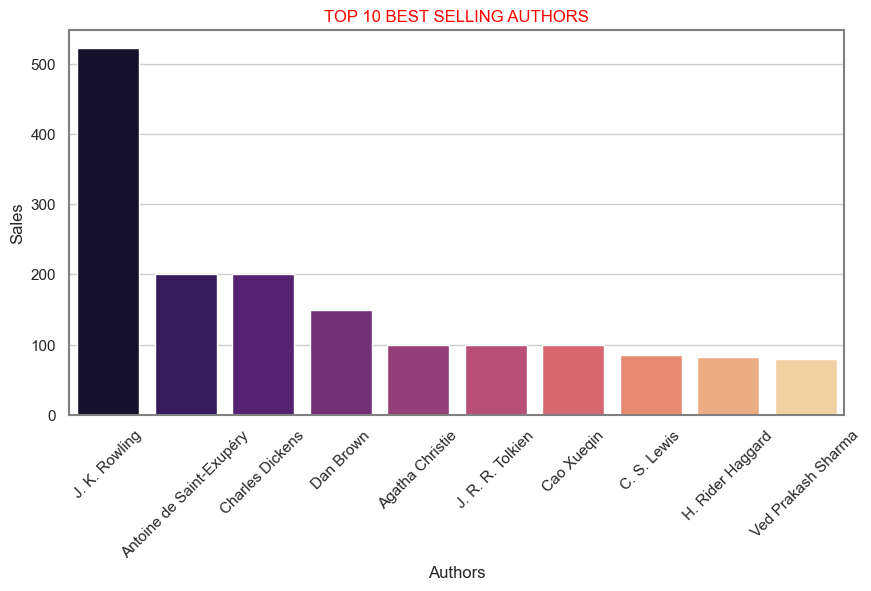

In [32]:
sns.set(style="whitegrid", rc={"axes.edgecolor": "gray", "axes.linewidth": 1.5})
plt.figure(figsize=(10,5))

sns.barplot(x=authors_sales.index,y=authors_sales.values,palette="magma")
plt.title("TOP 10 BEST SELLING AUTHORS",color="red")
plt.xlabel("Authors")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.show()

In [59]:
df.Genre.value_counts().nlargest(10)

Genre
Fantasy                                10
Novel                                   8
Self-help                               7
Children's Literature                   4
Historical fiction                      4
Fiction                                 3
Fantasy, Children's fiction             2
Children's fiction                      2
Children's Literature, picture book     2
Thriller                                2
Name: count, dtype: int64

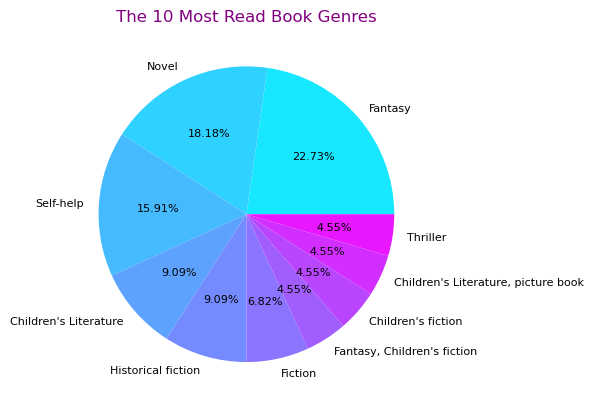

In [61]:
colors = sns.color_palette("cool", 10) 
plt.pie(df.Genre.value_counts().nlargest(10),labels=df.Genre.value_counts().nlargest(10).index,autopct="%1.2f%%",colors=colors,textprops={'fontsize': 8} )
plt.title("The 10 Most Read Book Genres",color="purple")
plt.show()

In [34]:
genre_sales=df.groupby(["First_published","Genre"])[["Approximate_sales"]].agg(Sum=("Approximate_sales",np.sum)).sort_values(by="Sum",ascending=False).head(11)
genre_sales.reset_index(inplace=True,drop=False)
genre_sales

,First_published,Genre,Sum
0,1943,Novella,200.0
1,1859,Historical fiction,200.0
2,1997,Fantasy,120.0
3,1937,Fantasy,100.0
4,1791,Family saga,100.0
5,1955,Novel,100.0
6,1939,Mystery,100.0
7,1950,"Fantasy, Children's fiction",85.0
8,1887,Adventure,83.0
9,2003,Mystery thriller,80.0


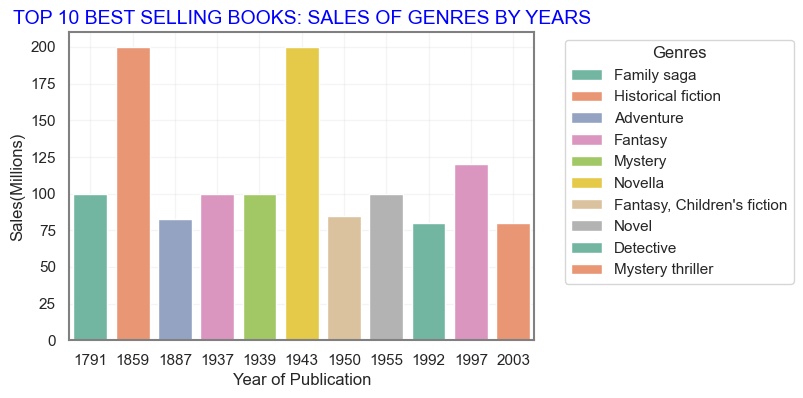

In [36]:
plt.figure(figsize=(6,4))
sns.barplot(data=genre_sales,x="First_published", y="Sum", hue="Genre",palette="Set2")
plt.title("TOP 10 BEST SELLING BOOKS: SALES OF GENRES BY YEARS", fontsize=14,color="blue")
plt.xlabel("Year of Publication", fontsize=12)
plt.ylabel("Sales(Millions)", fontsize=12)
plt.legend(title="Genres", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.2)
plt.show()

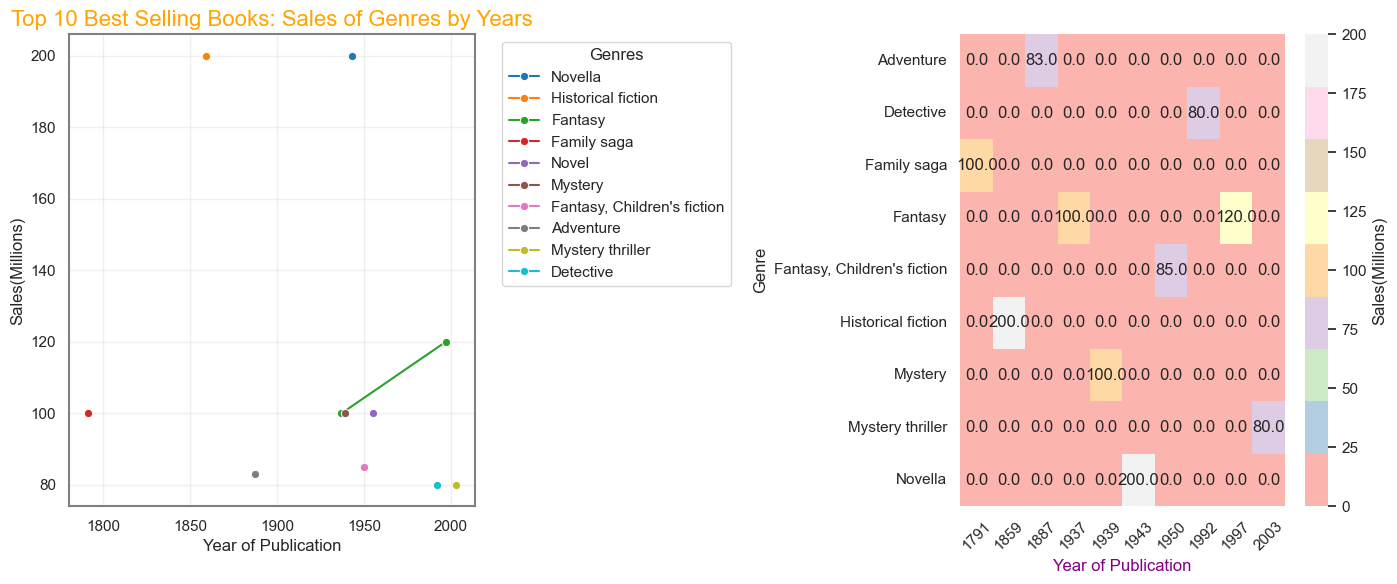

In [249]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.lineplot(data=genre_sales, x="First_published", y="Sum", hue="Genre", marker="o", palette="tab10", ax=axes[0])
axes[0].set_title("Top 10 Best Selling Books: Sales of Genres by Years", fontsize=16, color="orange")
axes[0].set_xlabel("Year of Publication", fontsize=12)
axes[0].set_ylabel("Sales(Millions)", fontsize=12)
axes[0].legend(title="Genres", bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0].grid(alpha=0.3)

heatmap_data = df.head(10).pivot_table(index="Genre", columns="First_published", values="Approximate_sales", aggfunc="sum", fill_value=0)
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="Pastel1", cbar_kws={"label": "Sales(Millions)"}, ax=axes[1])
axes[1].set_xlabel("Year of Publication", fontsize=12, color="purple")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [29]:
df.sample(3)

,Book,Author(s),Original_language,First_published,Approximate_sales,Genre
64,Who Moved My Cheese?,Spencer Johnson,English,1998,29.0,"Self-help, motivational, business fable, psych..."
150,The Help,Kathryn Stockett,English,2009,10.0,NaN
118,The Poky Little Puppy,Janette Sebring Lowrey,English,1942,15.0,NaN


In [322]:
years_sales=df.groupby("First_published")["Approximate_sales"].sum().sort_values(ascending=False).head(10)
years_sales

First_published
1943    200.0
1859    200.0
2003    176.5
1992    160.0
1939    145.0
1997    134.0
2000    129.0
1988    127.0
1979    117.0
2005    111.0
Name: Approximate_sales, dtype: float64

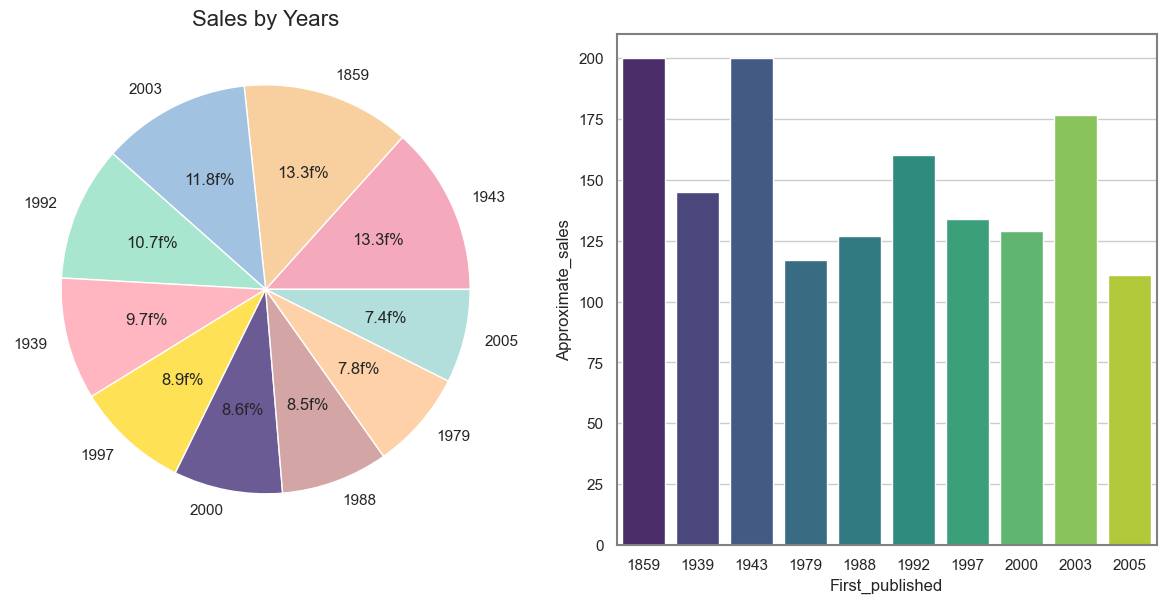

In [386]:
palette =[ "#F5A9BC", "#F8D0A0", "#A2C2E2", "#A8E6CF", "#FFB6C1","#FFE156", "#6B5B95", "#D4A5A5", "#FFD1A9", "#B2DFDB"]
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.pie(years_sales.values,labels=years_sales.index,colors=palette, autopct="%1.1ff%%")
plt.title("Sales by Years",fontsize=16)

plt.subplot(1,2,2)
sns.barplot(years_sales,palette="viridis")

plt.tight_layout()
plt.show()

In [314]:
df.sample(3)

,Book,Author(s),Original_language,First_published,Approximate_sales,Genre
76,The Godfather,Mario Puzo,English,1969,21.0,Crime novel
71,The Celestine Prophecy,James Redfield,English,1993,23.0,New-age spiritual novel
131,The Old Man and the Sea,Ernest Hemingway,English,1952,13.0,NaN


In [31]:
df.Original_language.value_counts()

Original_language
English       131
Russian         6
French          5
German          5
Japanese        5
Chinese         4
Italian         4
Spanish         3
Hindi           2
Norwegian       2
Swedish         2
Portuguese      1
Dutch           1
Czech           1
Yiddish         1
Gujarati        1
Name: count, dtype: int64

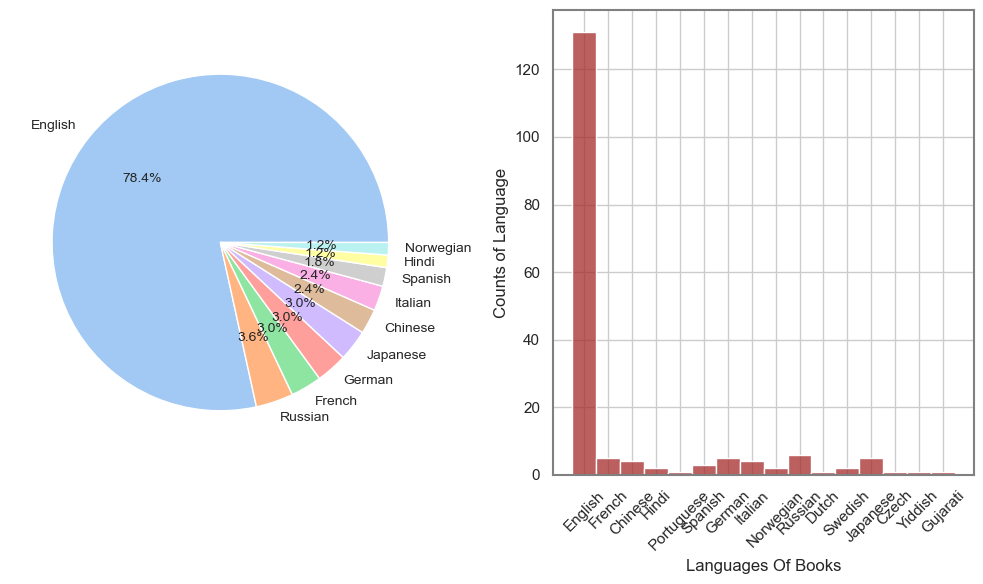

In [60]:
plt.figure(figsize=(10,6))
colors = sns.color_palette("pastel", 10)

plt.subplot(1,2,1)
plt.pie(df.Original_language.value_counts().nlargest(10),labels=df.Original_language.value_counts().nlargest(10).index,
        autopct="%1.1f%%", 
        labeldistance=1.1,
        colors=colors,
        textprops={"fontsize":10})

plt.subplot(1,2,2)
sns.histplot(df.Original_language,color="brown")
plt.xticks(rotation=45)
plt.xlabel("Languages Of Books")
plt.ylabel("Counts of Language")

plt.tight_layout()
plt.show()

In [37]:
df.sample(3)

,Book,Author(s),Original_language,First_published,Approximate_sales,Genre
141,The Prophet,Kahlil Gibran,English,1923,11.0,NaN
32,The Ginger Man,J. P. Donleavy,English,1955,50.0,Novel
53,How to Win Friends and Influence People,Dale Carnegie,English,1936,30.0,Self-help


In [39]:
df.dtypes

Book                  object
Author(s)             object
Original_language     object
First_published       object
Approximate_sales    float64
Genre                 object
dtype: object

In [64]:
language_sales=df.groupby("Original_language")[["Approximate_sales"]].agg(
    Max=('Approximate_sales', np.max),
    Min=('Approximate_sales', np.min),
    Sum=('Approximate_sales', np.sum),
    Mean=('Approximate_sales', np.mean)
)

In [66]:
language_sales=language_sales.reset_index(drop=False)

In [68]:
language_sales

,Original_language,Max,Min,Sum,Mean
0,Chinese,100.0,10.0,140.0,35.000000
1,Czech,20.0,20.0,20.0,20.000000
2,Dutch,35.0,35.0,35.0,35.000000
3,English,200.0,10.0,3966.0,30.274809
4,French,200.0,10.0,257.0,51.400000
5,German,50.0,12.0,113.0,22.600000
6,Gujarati,10.0,10.0,10.0,10.000000
7,Hindi,80.0,20.0,100.0,50.000000
8,Italian,50.0,11.5,110.5,27.625000
9,Japanese,20.0,10.0,72.0,14.400000


In [70]:
##language_sales.reset_index(inplace=True)
language_sales.columns 

Index(['Original_language', 'Max', 'Min', 'Sum', 'Mean'], dtype='object')

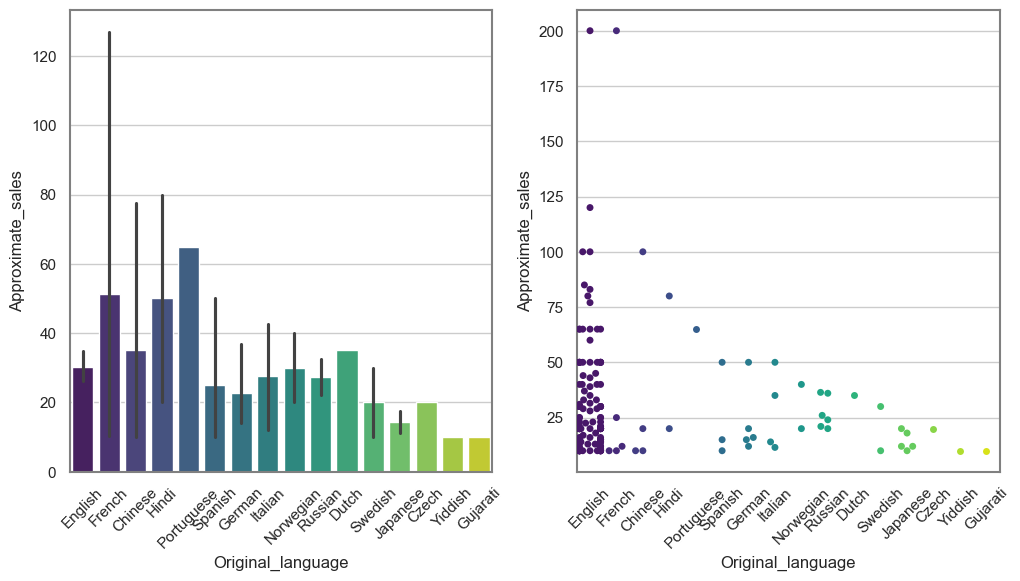

In [158]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.barplot(x='Original_language', y='Approximate_sales', data=df, palette='viridis')
plt.xticks(rotation=45)


plt.subplot(1,2,2)
sns.swarmplot(x=df.Original_language,y=df.Approximate_sales,palette="viridis")
plt.xticks(rotation=45)
plt.show()

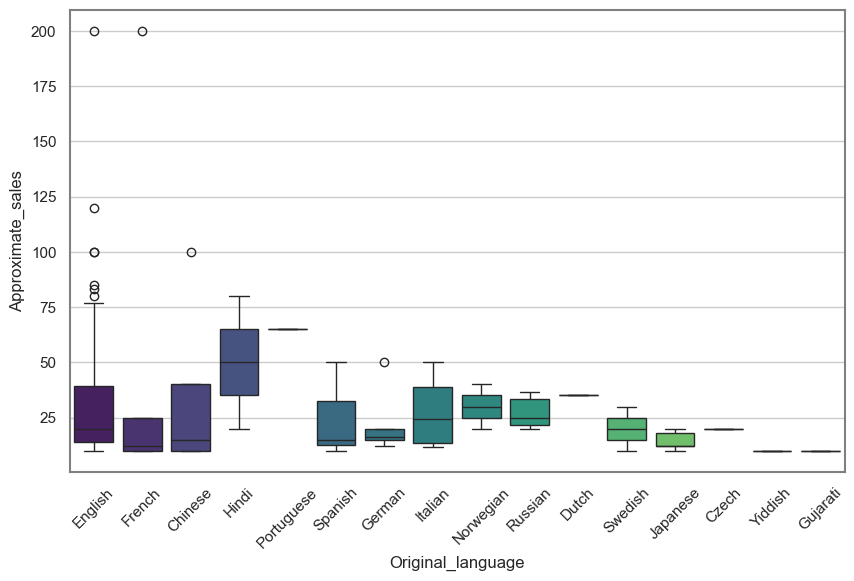

In [162]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df.Original_language,y=df.Approximate_sales,palette="viridis")
plt.xticks(rotation=45)
plt.show()

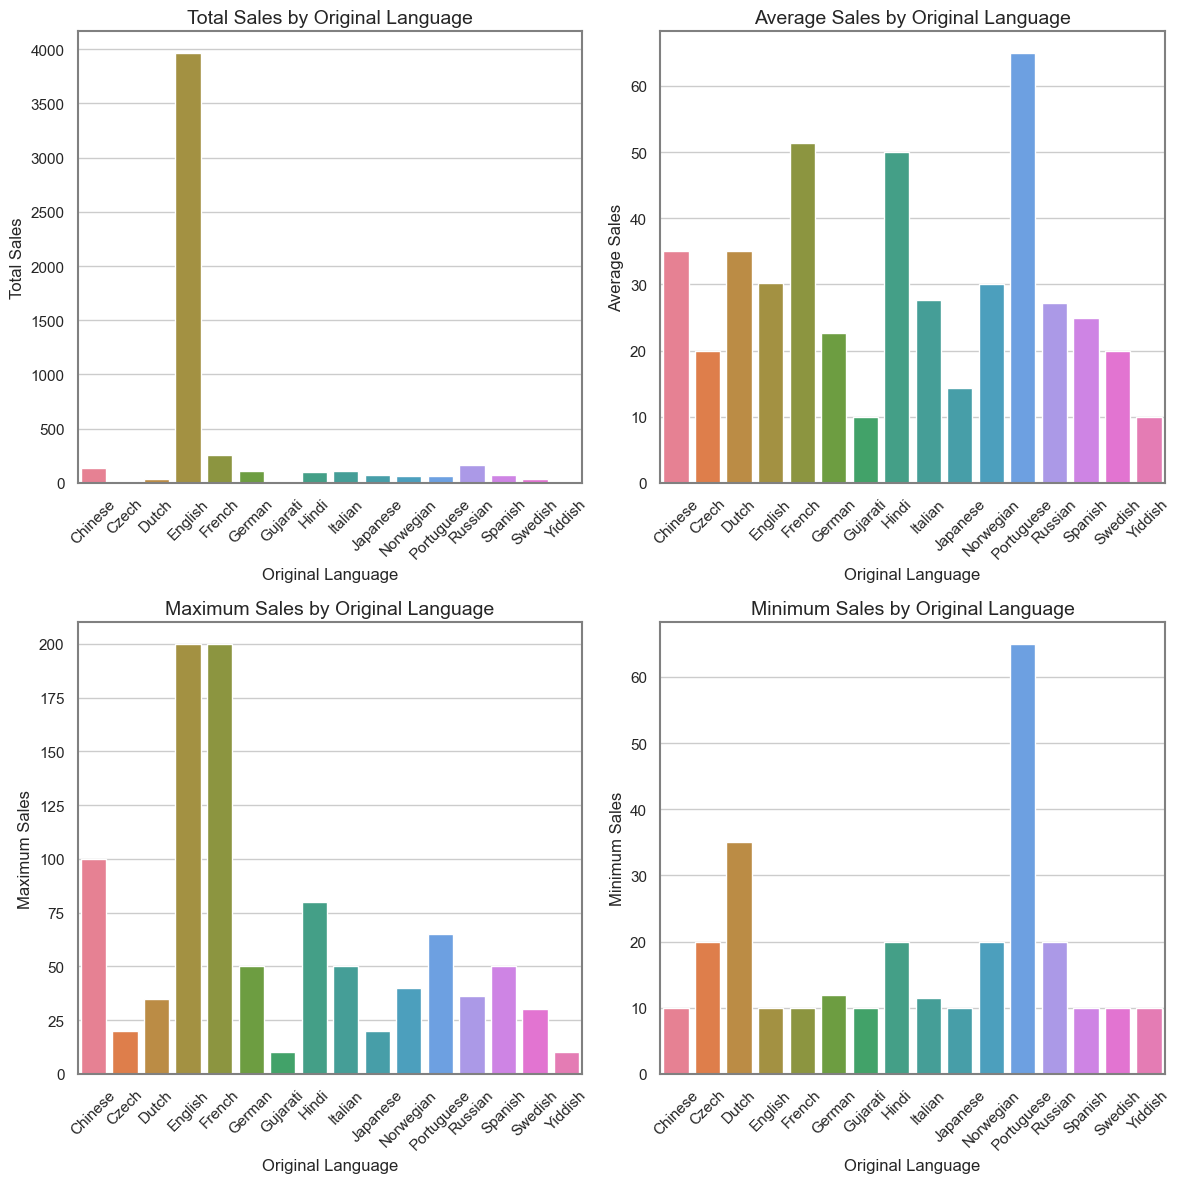

In [78]:
plt.figure(figsize=(12,12))

plt.subplot(2,2,1)
sns.barplot(x="Original_language", y='Sum', data=language_sales, palette="husl")
plt.xticks(rotation=45)
plt.title("Total Sales by Original Language", fontsize=14)
plt.xlabel("Original Language", fontsize=12)
plt.ylabel("Total Sales", fontsize=12)

plt.subplot(2,2,2)
sns.barplot(x="Original_language", y='Mean', data=language_sales, palette="husl")
plt.xticks(rotation=45)
plt.title("Average Sales by Original Language", fontsize=14)
plt.xlabel("Original Language", fontsize=12)
plt.ylabel("Average Sales", fontsize=12)

plt.subplot(2,2,3)
sns.barplot(x="Original_language", y='Max', data=language_sales, palette="husl")
plt.xticks(rotation=45)
plt.title("Maximum Sales by Original Language", fontsize=14)
plt.xlabel("Original Language", fontsize=12)
plt.ylabel("Maximum Sales", fontsize=12)

plt.subplot(2,2,4)
sns.barplot(x="Original_language", y='Min', data=language_sales, palette="husl")
plt.xticks(rotation=45)
plt.title("Minimum Sales by Original Language", fontsize=14)
plt.xlabel("Original Language", fontsize=12)
plt.ylabel("Minimum Sales", fontsize=12)

plt.tight_layout()
plt.show()

In [65]:
df.First_published.value_counts()

First_published
1979    5
1988    4
2012    4
1992    4
1974    4
       ..
2004    1
1986    1
1869    1
1982    1
1859    1
Name: count, Length: 95, dtype: int64

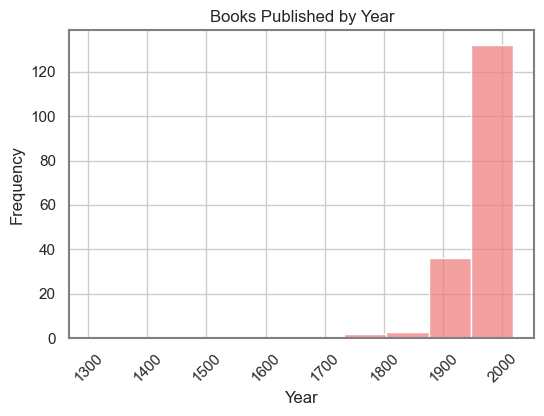

In [396]:
plt.figure(figsize=(6,4))
sns.histplot(df['First_published'], kde=False, bins=10, color='lightcoral')

plt.title('Books Published by Year')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [94]:
current_year=2024

def age_Calculator(x):
    return current_year - int(x)

In [96]:
df["Age_of_books"] = df["First_published"].transform(age_Calculator)

In [98]:
df.head(4)

,Book,Author(s),Original_language,First_published,Approximate_sales,Genre,Sales_category,Age_of_books
0,A Tale of Two Cities,Charles Dickens,English,1859,200.0,Historical fiction,High,165
1,The Little Prince (Le Petit Prince),Antoine de Saint-Exupéry,French,1943,200.0,Novella,High,81
2,Harry Potter and the Philosopher's Stone,J. K. Rowling,English,1997,120.0,Fantasy,High,27
3,And Then There Were None,Agatha Christie,English,1939,100.0,Mystery,Medium,85


In [118]:
df.Age_of_books

0      165
1       81
2       27
3       85
4      233
      ... 
169     40
170     71
171     28
172     95
173     28
Name: Age_of_books, Length: 174, dtype: int64

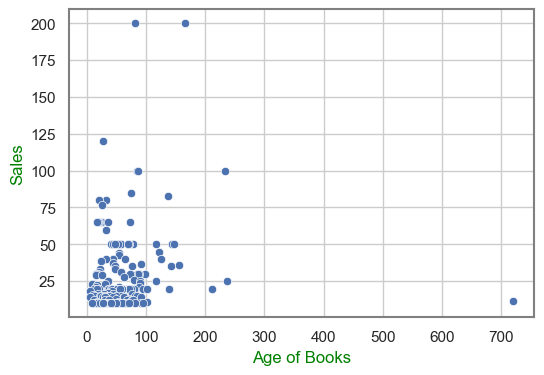

In [168]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=df.Age_of_books,y=df.Approximate_sales)
plt.xlabel("Age of Books",color="green")
plt.ylabel("Sales",color="green")
plt.show()

In [86]:
def sales_label(x):
    if int(x) >= 120:
        return 'High'
    if int(x) >=50 and int(x)<120:
        return 'Medium'
    if int(x) >= 0 and int(x) <50:
        return 'Low'

In [88]:
df["Sales_category"]=df["Approximate_sales"].transform(sales_label)

In [179]:
df.sample(3)

,Book,Author(s),Original_language,First_published,Approximate_sales,Genre,Sales_category,Age_of_books
88,Wolf Totem (狼图腾),Jiang Rong,Chinese,2004,20.0,Semi-autobiographical novel,Low,20
0,A Tale of Two Cities,Charles Dickens,English,1859,200.0,Historical fiction,High,165
29,Watership Down,Richard Adams,English,1972,50.0,Fantasy,Medium,52


In [181]:
df.Sales_category.value_counts()

Sales_category
Low       141
Medium     30
High        3
Name: count, dtype: int64

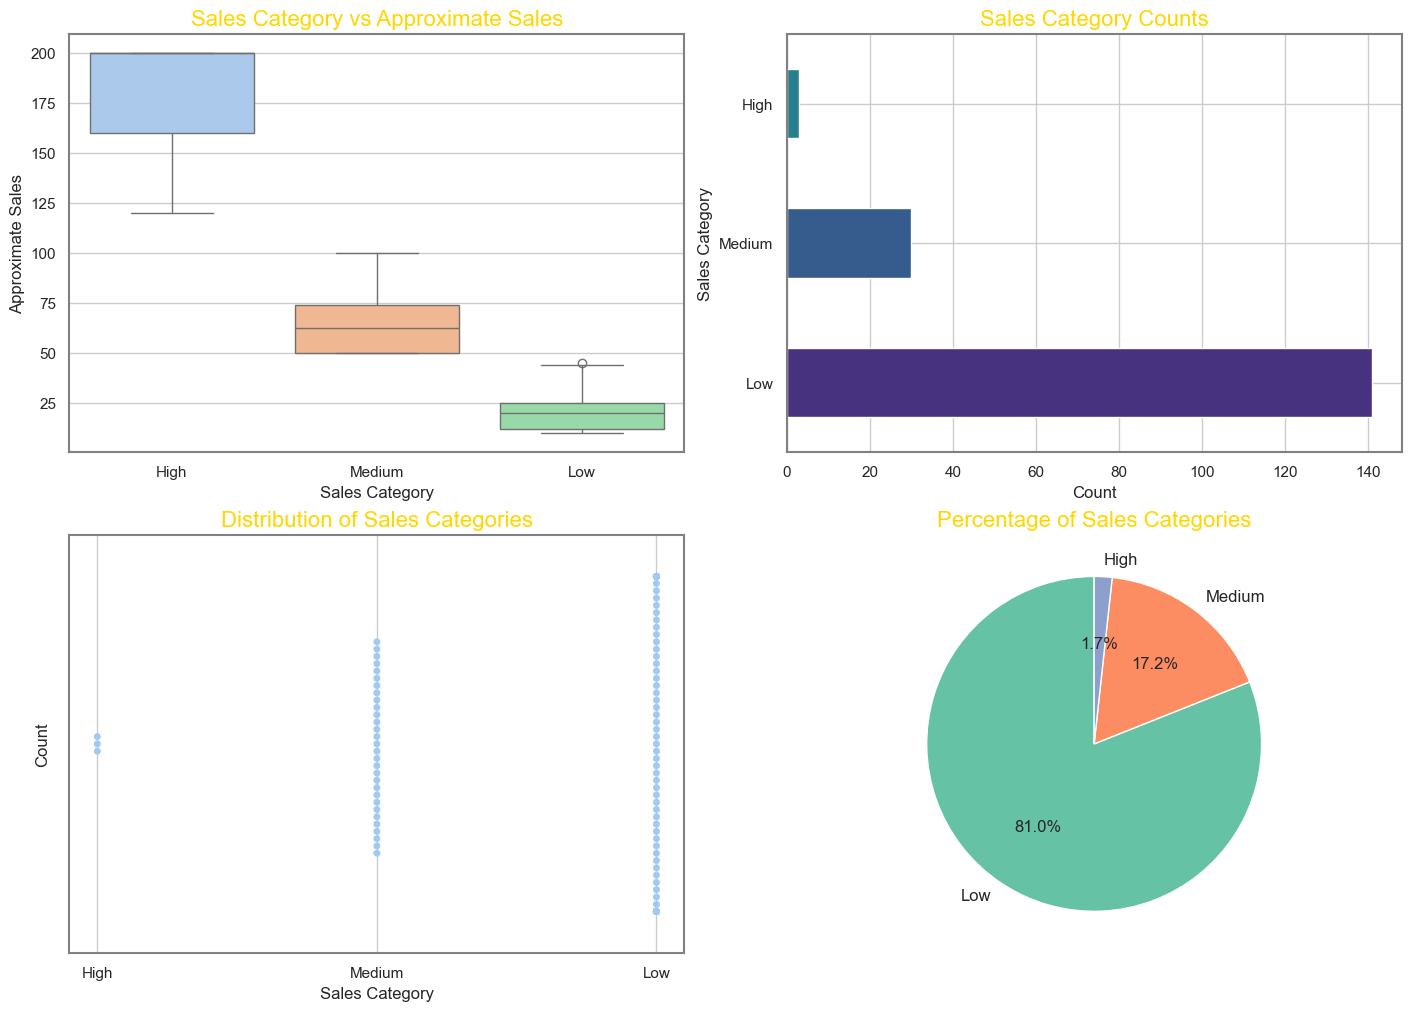

In [247]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10), constrained_layout=True)


sns.boxplot(
    x='Sales_category',
    y='Approximate_sales',
    data=df,
    ax=axes[0][0],
    palette='pastel'
)
axes[0][0].set_title('Sales Category vs Approximate Sales',fontsize=16,color="gold")
axes[0][0].set_xlabel('Sales Category')
axes[0][0].set_ylabel('Approximate Sales')


df['Sales_category'].value_counts().plot(
    kind='barh',
    color=sns.color_palette('viridis'),
    ax=axes[0][1]
)
axes[0][1].set_xlabel('Count')
axes[0][1].set_ylabel('Sales Category')
axes[0][1].set_title('Sales Category Counts',fontsize=16,color="gold")


sns.swarmplot(
    x='Sales_category',
    data=df,
    ax=axes[1][0],
    palette='pastel'
)
axes[1][0].set_xlabel('Sales Category')
axes[1][0].set_ylabel('Count')
axes[1][0].set_title('Distribution of Sales Categories',fontsize=16,color="gold")


df['Sales_category'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    colors=sns.color_palette('Set2'),
    startangle=90,
    ax=axes[1][1],
    fontsize=12
)
axes[1][1].set_ylabel('')
axes[1][1].set_title('Percentage of Sales Categories',fontsize=16,color="gold")

plt.show()

In [253]:
df.First_published.value_counts()

First_published
1979    5
1988    4
2012    4
1992    4
1974    4
       ..
2004    1
1986    1
1869    1
1982    1
1859    1
Name: count, Length: 95, dtype: int64

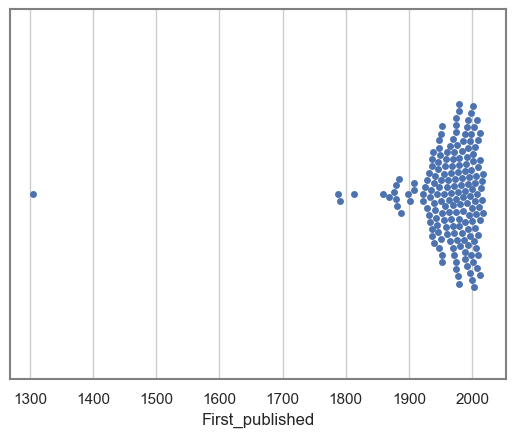

In [255]:
sns.swarmplot(x=df.First_published);